Import library

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


Baca data

In [3]:
df = pd.read_excel("cuaca_ekstrem.xlsx", sheet_name="Sheet1", header=1)
df.head()

,No.,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,0,7204,2025-07-07,CUACA EKSTREM,Kecamatan:\nKec. Galang,Toli Toli,Sulawesi Tengah,Dokumentasi,0,0,0,2,19,0,0
1,2,0,5107,2025-07-06,CUACA EKSTREM,Kecamatan:\nKec. Karangasem Kec. Sidemen,Karangasem,Bali,Dokumentasi,0,2,0,0,0,0,0
2,3,0,7307,2025-07-05,CUACA EKSTREM,Kecamatan:\nKec. Pulau Sembilan,Sinjai,Sulawesi Selatan,Dokumentasi,0,0,0,0,5,0,0
3,4,0,3201,2025-07-05,CUACA EKSTREM,Kecamatan:\nKec. Tamansari Kec. Dramaga Kec. M...,Bogor,Jawa Barat,Dokumentasi,0,0,0,0,6,0,0
4,5,0,3201,2025-07-04,CUACA EKSTREM,Kecamatan:\nKec. Ranca Bungur,Bogor,Jawa Barat,Dokumentasi,0,0,0,0,4,0,0


pilih kolom pentingnya

In [4]:
df = df[[
    "Kejadian", "Provinsi", "Meninggal", "Hilang", "Terluka",
    "Rumah Rusak", "Rumah Terendam", "Fasum Rusak"
]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Kejadian        1221 non-null   object
 1   Provinsi        1221 non-null   object
 2   Meninggal       1221 non-null   int64 
 3   Hilang          1221 non-null   int64 
 4   Terluka         1221 non-null   int64 
 5   Rumah Rusak     1221 non-null   int64 
 6   Rumah Terendam  1221 non-null   int64 
 7   Fasum Rusak     1221 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 76.4+ KB


Mmembersihkan data

In [5]:
# Tampilkan jumlah missing value di setiap kolom
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])  # hanya kolom yang memiliki NaN
print(df.isna().sum())
print("Total missing values:", df.isna().sum().sum())


Series([], dtype: int64)
Kejadian          0
Provinsi          0
Meninggal         0
Hilang            0
Terluka           0
Rumah Rusak       0
Rumah Terendam    0
Fasum Rusak       0
dtype: int64
Total missing values: 0


Hitung total dampak

In [6]:
df["Total_Dampak"] = (
    df["Meninggal"] + df["Hilang"] + df["Terluka"] +
    df["Rumah Rusak"] + df["Rumah Terendam"] + df["Fasum Rusak"]
)


Klasifikasi tingkat keparahan

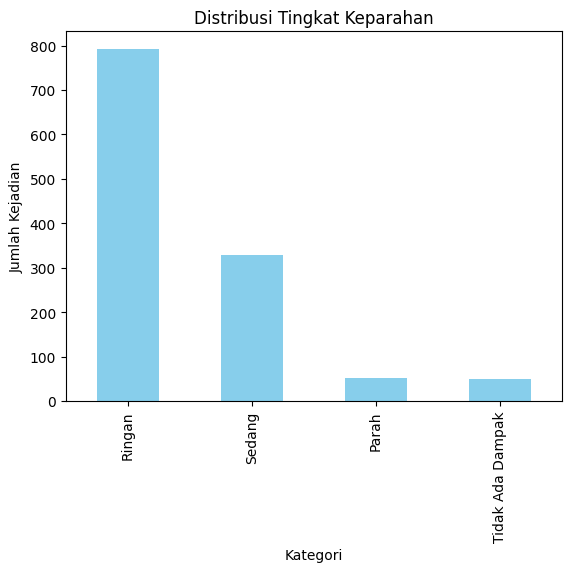

In [15]:
def klasifikasi_keparahan(total):
    if total == 0:
        return "Tidak Ada Dampak"
    elif total <= 20:
        return "Ringan"
    elif total <= 100:
        return "Sedang"
    else:
        return "Parah"

df["Tingkat_Keparahan"] = df["Total_Dampak"].apply(klasifikasi_keparahan)

df["Tingkat_Keparahan"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribusi Tingkat Keparahan")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Kejadian")
plt.show()

label encoding

In [8]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

df["Kejadian"] = le1.fit_transform(df["Kejadian"])
df["Provinsi"] = le2.fit_transform(df["Provinsi"])
df["Label"] = le3.fit_transform(df["Tingkat_Keparahan"])
df.head(10)

,Kejadian,Provinsi,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak,Total_Dampak,Tingkat_Keparahan,Label
0,0,53,0,0,2,19,0,0,21,Sedang,2
1,0,5,2,0,0,0,0,0,2,Ringan,1
2,0,52,0,0,0,5,0,0,5,Ringan,1
3,0,18,0,0,0,6,0,0,6,Ringan,1
4,0,18,0,0,0,4,0,0,4,Ringan,1
5,0,58,0,0,0,21,0,0,21,Sedang,2
6,0,54,0,0,0,10,0,0,10,Ringan,1
7,0,51,0,0,0,10,0,0,10,Ringan,1
8,0,58,0,0,0,32,0,0,32,Sedang,2
9,0,18,0,0,0,8,0,0,8,Ringan,1


persiapan fitur dan label

In [9]:
X = df.drop(columns=["Total_Dampak", "Tingkat_Keparahan", "Label"])
y = df["Label"]

Train/test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cek

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluasi model

In [ ]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.99      0.99      0.99       168
           2       1.00      0.98      0.99        56
           3       0.91      1.00      0.95        10

    accuracy                           0.99       245
   macro avg       0.98      0.99      0.98       245
weighted avg       0.99      0.99      0.99       245


Confusion Matrix:
[[ 11   0   0   0]
 [  0 167   0   1]
 [  0   1  55   0]
 [  0   0   0  10]]
